<a href="https://colab.research.google.com/github/Toxxi-frank/Deeplearning/blob/main/Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Di den thu muc chua data

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ./cats_and_dogs_filtered.zip

# tải dataset về 

--2021-05-22 10:44:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.15.80, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M  60.4MB/s    in 1.1s    

2021-05-22 10:44:33 (60.4 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
main_folder = './'
!unzip -q cats_and_dogs_filtered.zip -d $main_folder
# giai nen data 

In [ ]:
cd cats_and_dogs_filtered

/content/drive/My Drive/cats_and_dogs_filtered


In [ ]:
train_folder = './train'

In [ ]:
valid_folder = './validation'

Xay dung mo hinh

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential 

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape=(150,150,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Conv2D(32, (3,3), activation= 'relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3,3), activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
Total params: 23,584
Trainable params: 23,584
Non-trainable params: 0
____________________________________________________

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512, activation='relu'))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
valid_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
generated_train_data = train_generator.flow_from_directory(
    train_folder, target_size = (150,150),
    batch_size = 128, class_mode='binary'
) 

Found 2000 images belonging to 2 classes.


In [ ]:
generated_train_data

In [ ]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder, target_size = (150,150),
    batch_size = 128, class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    generated_train_data, steps_per_epoch =8,
    epochs =15, verbose =1, validation_data = generated_valid_data,
    validation_steps = 8
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 40s 972ms/step - loss: 3.5138 - acc: 0.5000 - val_loss: 0.8779 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 895ms/step - loss: 0.7094 - acc: 0.5753 - val_loss: 0.6801 - val_acc: 0.5000
Epoch 3/15
8/8 [==============================] - 7s 907ms/step - loss: 0.6755 - acc: 0.5482 - val_loss: 0.6895 - val_acc: 0.5000
Epoch 4/15
8/8 [==============================] - 7s 925ms/step - loss: 0.6738 - acc: 0.5988 - val_loss: 0.6789 - val_acc: 0.6510
Epoch 5/15
8/8 [==============================] - 7s 911ms/step - loss: 0.6596 - acc: 0.6911 - val_loss: 0.6687 - val_acc: 0.5720
Epoch 6/15
8/8 [==============================] - 7s 907ms/step - loss: 0.6408 - acc: 0.6629 - val_loss: 0.8171 - val_acc: 0.5000
Epoch 7/15
8/8 [==============================] - 7s 909ms/step - loss: 0.7093 - acc: 0.5926 - val_loss: 0.6482 - val_acc: 0.6420
Epoch 8/15
8/8 [==============================] - 7s 892ms/step - loss: 0.7630 - acc: 0.6

Thuc hien training

In [ ]:
import tensorflow as tf

DESIRED_ACCURACY = 0.7

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>DESIRED_ACCURACY):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit_generator(
    generated_train_data, steps_per_epoch =8,
    epochs =15, verbose =1, validation_data = generated_valid_data,
    validation_steps = 8,
    callbacks=[callbacks],
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 7s 961ms/step - loss: 0.5062 - acc: 0.7561 - val_loss: 0.7448 - val_acc: 0.5950
Epoch 2/15
8/8 [==============================] - 7s 902ms/step - loss: 0.4251 - acc: 0.7998 - val_loss: 0.8834 - val_acc: 0.5950
Epoch 3/15
8/8 [==============================] - 7s 906ms/step - loss: 0.4443 - acc: 0.7951 - val_loss: 0.8632 - val_acc: 0.5990
Epoch 4/15
8/8 [==============================] - 7s 891ms/step - loss: 0.6723 - acc: 0.6988 - val_loss: 0.6486 - val_acc: 0.6560
Epoch 5/15
8/8 [==============================] - 7s 897ms/step - loss: 0.4039 - acc: 0.8164 - val_loss: 0.6523 - val_acc: 0.6640
Epoch 6/15
8/8 [==============================] - 7s 909ms/step - loss: 0.3461 - acc: 0.8516 - val_loss: 0.6389 - val_acc: 0.6870
Epoch 7/15
8/8 [==============================] - 7s 900ms/step - loss: 0.4328 - acc: 0.8340 - val_loss: 1.2088 - val_acc: 0.5610
Epoch 8/15
8/8 [==============================] - 7s 880ms/step - loss: 0.4834 - acc: 0.77

Load file va du doan

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()

Saving 1-thit-cho-reuters_wbmt.jpg to 1-thit-cho-reuters_wbmt (1).jpg


In [ ]:
for fn in uploaded.keys():
  path = './' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)/255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  print(images.shape)
  classes = model.predict(images, batch_size=10)
  if classes[0]>0.5:
    print(fn + 'is a cat')
  else: 
    print(fn + "is a dog")
  

(1, 150, 150, 3)
1-thit-cho-reuters_wbmt.jpgis a dog


Hien thi do chinh xac cua mo hinh

Text(0.5, 1.0, 'Training and validation loss')

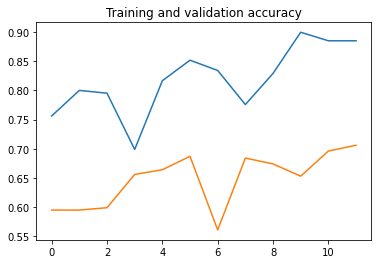

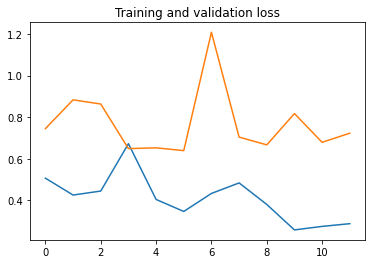

In [ ]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )